## Data Gathering and Prepartion
1. Located the accessible trailheads in Shenandoah National Park using the park’s map as a guide, https://www.nps.gov/shen/planyourvisit/maps.htm. Developed an Excel spreadsheet that contained all the trailhead data. Converted the spreadsheet to a CSV file. Added the CSV file to ArcGIS Pro.
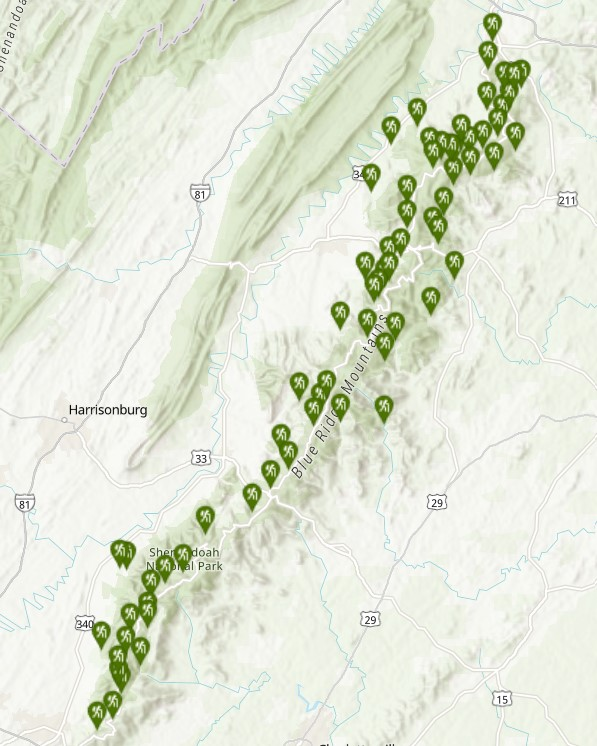

2. Cross-referenced all the nearest Hospitals and Fire Departments to Shenandoah National Park using Google Maps. Developed two Excel spreadsheets for each public safety services. Converted the spreadsheets to CSV files. Added the two CSV files to ArcGIS Pro.
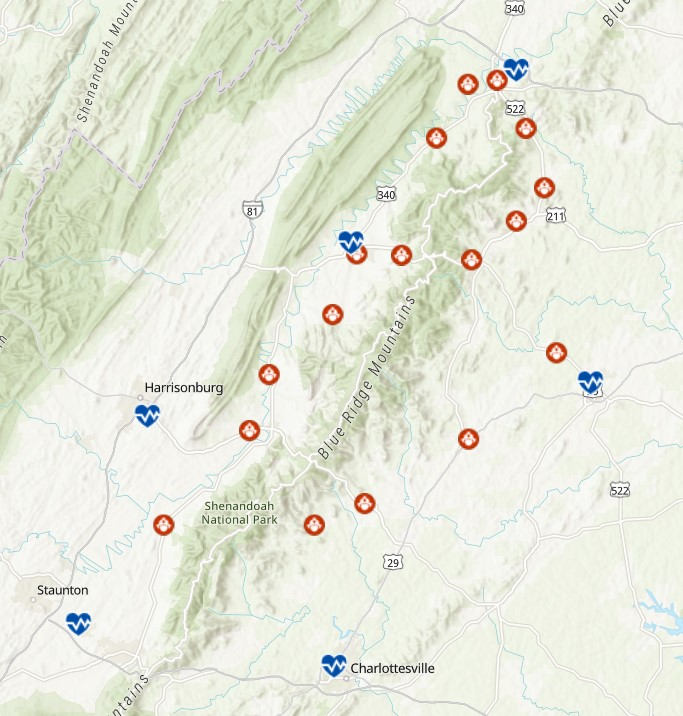

3.	Located a DEM of the Shenandoah Valley through the USDA’s Geospatial Data Gateway, https://datagateway.nrcs.usda.gov/GDGOrder.aspx?order=QuickState. 
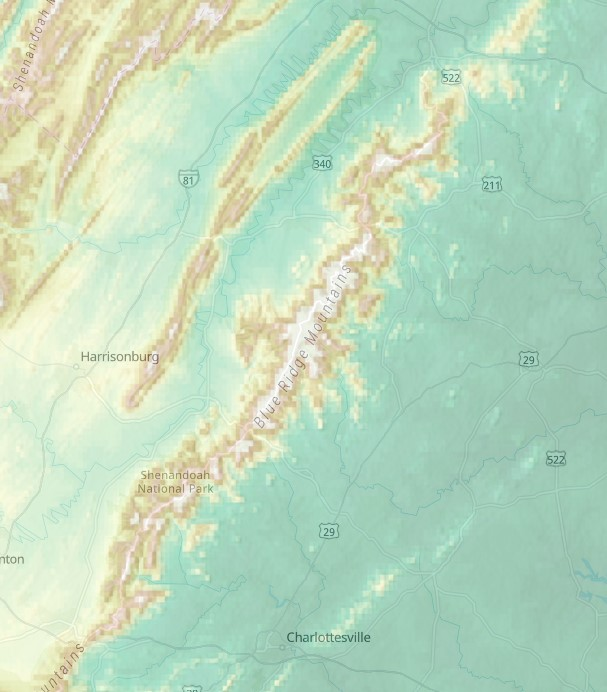

4. Ran a DEM to Points tool in ArcGIS Pro.

In [ ]:
import arcpy
arcpy.conversion.RasterToPoint("RasterClip", r"C:\Users\brysm\Documents\Bootcamp GIS\02 Set up AWS map services for wildfire assessments\Assignment 10\VA DEM\RasterToPoint-SNP0.shp", "VALUE")

5. Used the Spatially Join tool to apply elevation data to the trailheads.

In [ ]:
arcpy.analysis.SpatialJoin("SNP_Trailheads", "RasterToPointSNP0_Clip", r"C:\Users\brysm\Documents\Bootcamp GIS\02 Set up AWS map services for wildfire assessments\Assignment 10\Assignment 10-Scratch\Default.gdb\RasterToPointSNP3", "JOIN_ONE_TO_ONE", "KEEP_ALL", 'Trailhead_Name "Trailhead Name" true true false 255 Text 0 0,First,#,SNP_Trailheads,Trailhead_Name,0,255;District "District" true true false 255 Text 0 0,First,#,SNP_Trailheads,District,0,255;Lat "Lat" true true false 8 Double 0 0,First,#,SNP_Trailheads,Lat,-1,-1;Lon "Lon" true true false 8 Double 0 0,First,#,SNP_Trailheads,Lon,-1,-1;pointid "pointid" true true false 4 Long 0 0,First,#,RasterToPointSNP0_Clip,pointid,-1,-1;grid_code "grid_code" true true false 4 Long 0 0,First,#,RasterToPointSNP0_Clip,grid_code,-1,-1', "INTERSECT", "1 Miles", '')

6. Used the Summarize Elevation tool to calculate the elevation at each point for reference purposes.

In [ ]:
arcpy.agolservices.SummarizeElevation("RasterToPointSNP3", '', "10m", "SLOPE_ASPECT")

7. Located a 1984-2020 fire occurrences shapefile for Virginia through MTBS, https://mtbs.gov/direct-download.  Clipped the fire occurrences only pertaining within and near Shenandoah National Park.
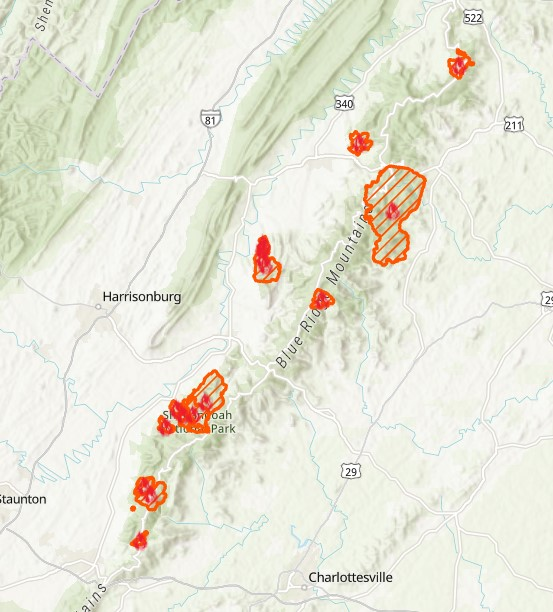

8. Created an ArcGIS Experience for the Elevation Profile, https://experience.arcgis.com/experience/cb59c8a7b91f44ab886adc74896a12ff. 

## Analysis
9. Ran the Find Nearest analysis tool option in ArcGIS Online. The Trailheads (TH) were the starting location and the Hospitals were the nearest location. Rural Driving Time was the measured distance.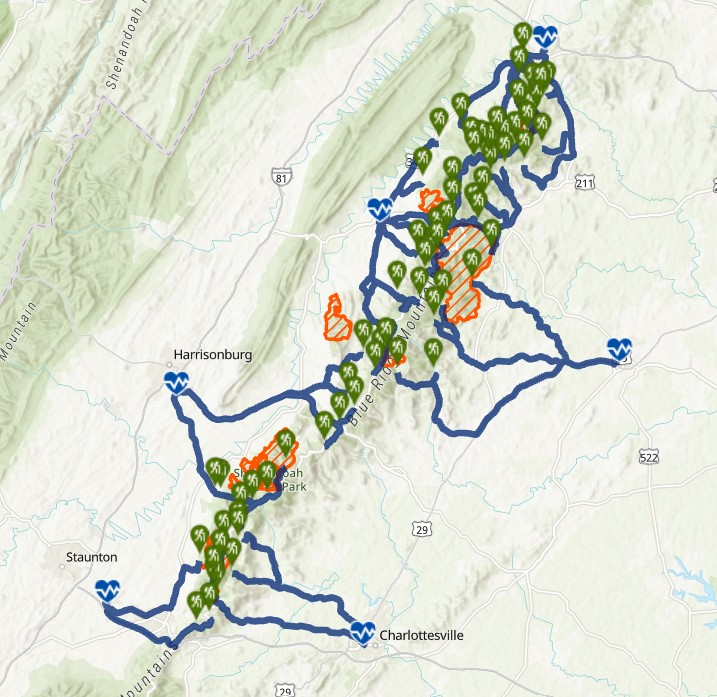

10.	Used the Buffer tool to create a 7.5-mi radius around Shenandoah National Park. Preliminary distances of 5-mile and 10-mile buffers proved to be too short or too far of a distance.
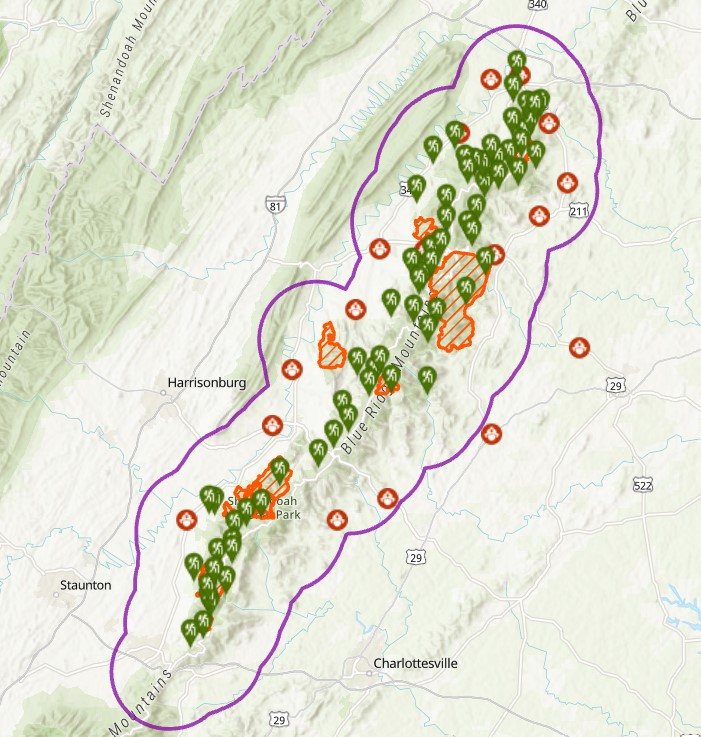

In [ ]:
arcpy.analysis.Buffer("SNP Boundary", r"C:\Users\brysm\Documents\Bootcamp GIS\02 Set up AWS map services for wildfire assessments\Assignment 10\VA DEM\SNP_Buffer7.5Mi.shp", "7.5 Miles", "FULL", "ROUND", "NONE", None, "PLANAR")

11.	Ran the Driving-Time Areas analysis tool option in ArcGIS Online. The 17 Fire Depts were the point layers. Rural Driving Distance of 5-, 10-, 15-, and 20-mile intervals. Overlapped areas for each Fire Depts.
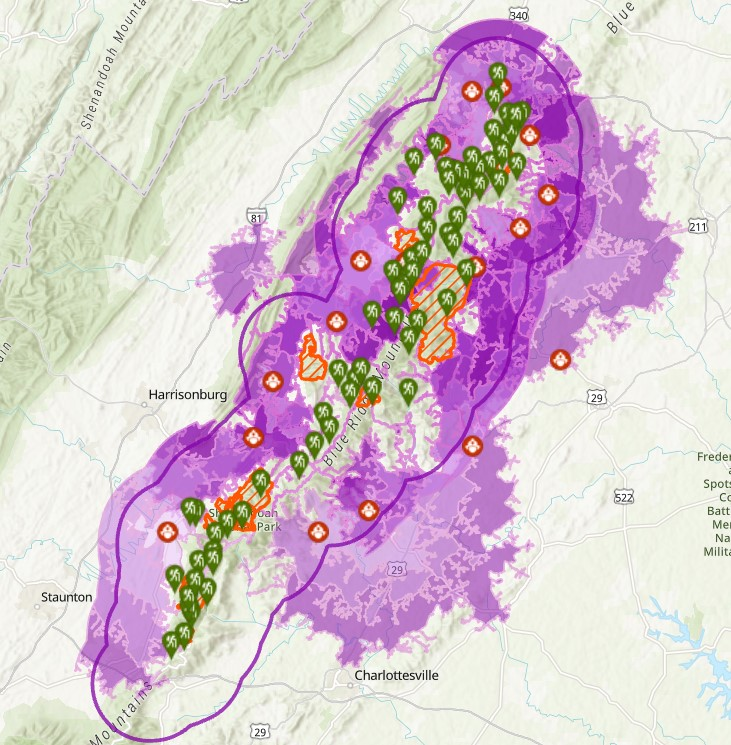

12. Created an ArcGIS Dashboard to show the travel times from the trailheads to the nearest hospitals, https://bry.maps.arcgis.com/apps/dashboards/7d34d25046f24957b225af9af50e1f39
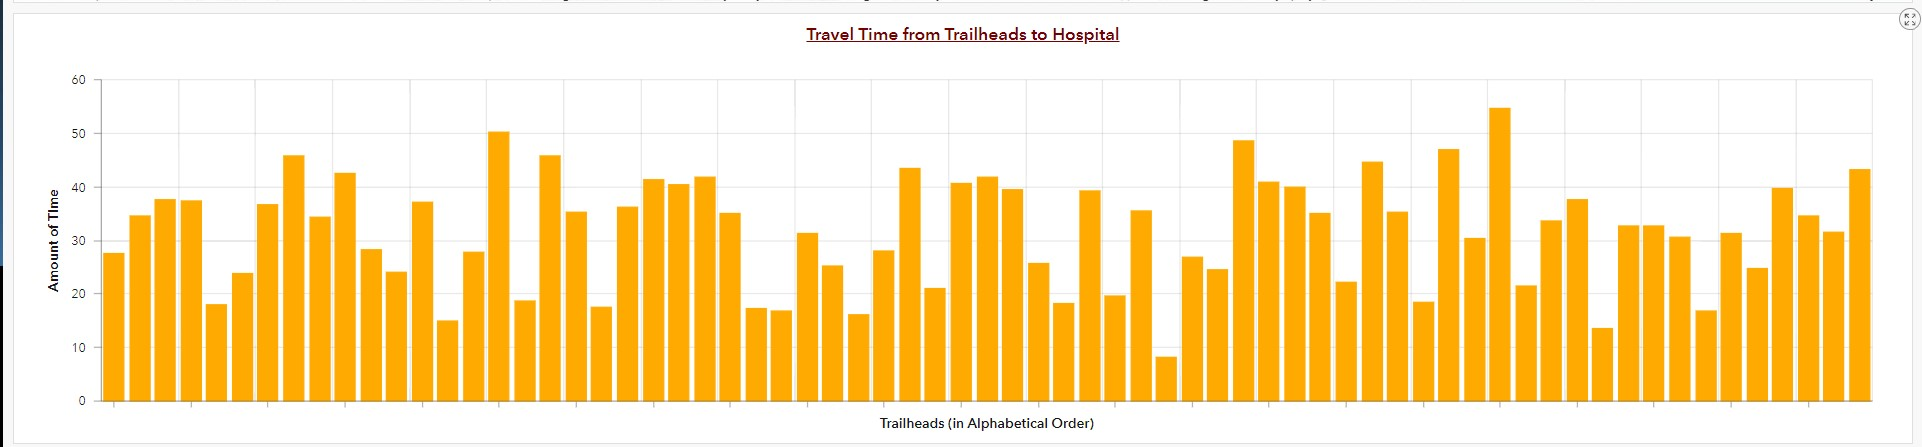